In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


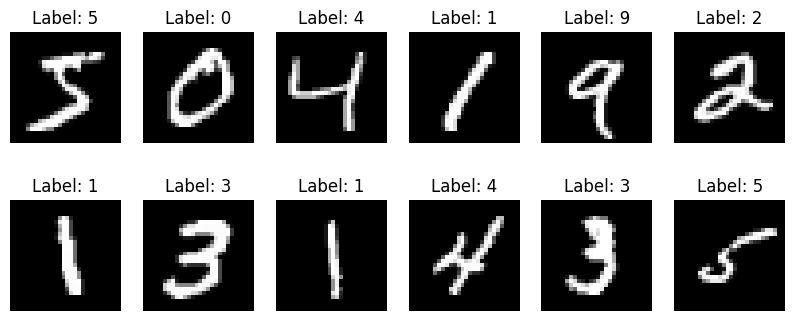

In [ ]:
some_images = x_train[:12]
some_labels = y_train[:12]


plt.figure(figsize=(10,4))
for i in range(12):
  plt.subplot(2,6,i+1)
  plt.imshow(some_images[i],cmap='grey')
  plt.axis('off')
  plt.title(f"Label: {some_labels[i]}")

| Image Type | Channels | Shape Example |
| ---------- | -------- | ------------- |
| Grayscale  | 1        | (28, 28, 1)   |
| RGB        | 3        | (28, 28, 3)   |


In [ ]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)

Train shape: (60000, 28, 28, 1)
Test shape: (10000, 28, 28, 1)


In [ ]:
from keras.utils import to_categorical
print("y_train shape before:", y_train.shape)
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,num_classes=10)
print("y_train shape after:", y_train.shape)
print("y_test shape after:", y_test.shape)
print(y_train,y_test)

y_train shape before: (60000,)
y_train shape after: (60000, 10)
y_test shape after: (10000, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]] [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# CNN Layers and Their Parameters

This note explains **Conv2D, MaxPooling2D, Flatten, and Dense** layers used in CNNs, with clear parameter meanings and reasoning.

---

## Conv2D

```python
from tensorflow.keras.layers import Conv2D

Conv2D(filters, kernel_size, activation=None, input_shape=None, padding='valid', strides=(1,1))
```

- **filters**: Number of output channels (feature maps), e.g., 32 or 64. More filters capture more patterns.
- **kernel_size**: Size of the filter, e.g., (3,3). Controls the receptive field.
- **activation**: Activation function, e.g., 'relu'.
- **input_shape**: Shape of the input, only needed in the first layer. For MNIST: (28,28,1).
- **padding**: 'valid' (no padding, reduces dimensions) or 'same' (pads to keep dimensions).
- **strides**: Step size of the filter. Default is (1,1).

**Purpose:** Extract spatial features from images.

---

## MaxPooling2D

```python
from tensorflow.keras.layers import MaxPooling2D

MaxPooling2D(pool_size=(2,2), strides=None, padding='valid')
```

- **pool_size**: Size of the pooling window, e.g., (2,2).
- **strides**: Step size, defaults to pool_size.
- **padding**: 'valid' or 'same'.

**Purpose:** Downsamples feature maps, reducing computation and adding translation invariance.

---

## Flatten

```python
from tensorflow.keras.layers import Flatten

Flatten()
```

**Purpose:** Flattens multi-dimensional feature maps into a 1D vector for Dense layers.

---

## Dense

```python
from tensorflow.keras.layers import Dense

Dense(units, activation=None)
```

- **units**: Number of neurons, e.g., 128 or 10.
- **activation**: Activation function, e.g., 'relu' or 'softmax'.

**Purpose:** Fully connected layer for learning high-level patterns and producing output probabilities.

---

## Why 32, 64, 128?

- **32, 64 filters in Conv2D**: Allow capturing increasingly complex patterns as depth increases.
- **128 units in Dense**: Provides enough capacity to learn meaningful combinations of features.
- **10 units in final Dense with softmax**: For 10-class digit classification in MNIST.

---

## Example MNIST CNN

```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
```

This architecture:
- Learns feature hierarchies (edges, shapes, patterns).
- Reduces spatial dimensions while increasing feature depth.
- Outputs class probabilities for digit classification.

---

## Summary Table

| Layer         | Key Parameters            | Purpose                      |
|---------------|---------------------------|------------------------------|
| Conv2D        | filters, kernel_size     | Extract spatial features     |
| MaxPooling2D  | pool_size                | Downsample feature maps      |
| Flatten       | -                        | Reshape for Dense layers     |
| Dense         | units, activation        | Learn high-level patterns    |

---

This single file provides the practical, structured reference you need while working with CNNs in your MNIST and general image classification projects.


In [ ]:
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten, BatchNormalization,Dropout
from keras.models import Sequential

In [ ]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(512,activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10,activation='softmax')
]


)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       819,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 845,706 (3.23 MB)

 Trainable params: 844,682 (3.22 MB)

 Non-trainable params: 1,024 (4.00 KB)

| Term                     | Meaning                                                          |
| ------------------------ | ---------------------------------------------------------------- |
| **Total params**         | All weights, biases, statistics in the model                     |
| **Trainable params**     | Weights and biases updated during training                       |
| **Non-trainable params** | Typically moving averages in BatchNorm, not updated by gradients |


In [ ]:
history = model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=128,epochs=2,validation_data=(x_test,y_test),verbose=1)

Epoch 1/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 80ms/step - accuracy: 0.9259 - loss: 0.2405 - val_accuracy: 0.9824 - val_loss: 0.0639
Epoch 2/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 84ms/step - accuracy: 0.9853 - loss: 0.0465 - val_accuracy: 0.9859 - val_loss: 0.0436


| Term                      | Meaning                                                        |
| ------------------------- | -------------------------------------------------------------- |
| **Validation Data**       | Portion of data used to monitor performance during training    |
| **validation\_split=0.1** | Use 10% of training data for validation automatically          |
| **Purpose**               | Check generalization, detect overfitting, tune hyperparameters |


In [ ]:
score = model.evaluate(x_test,y_test)
print(score)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9831 - loss: 0.0536
[0.0436282679438591, 0.9858999848365784]


| Item                                | Meaning                                              |
| ----------------------------------- | ---------------------------------------------------- |
| `loss`                              | Cross-entropy loss on the test set                   |
| `accuracy`                          | Classification accuracy on the test set              |
| `313/313`                           | Batches processed during evaluation                  |
| `98.31%` (bar) vs `98.59%` (result) | Small difference due to computation reporting timing |


In [ ]:
print('Test Accuracy: %.2f'%score[1])

Test Accuracy: 0.99


# Data Augmentation in Deep Learning

---

## What is Data Augmentation?

Data augmentation is the process of generating **new training samples by modifying existing data** while preserving labels.

**Example:** Rotating, flipping, shifting, or zooming images to create new variations.

---

## Why Use Data Augmentation?

- **Prevent Overfitting:** Adds variability, reducing memorization of training data.
- **Improve Generalization:** Prepares the model for real-world variations.
- **Expand Small Datasets:** Increases effective dataset size without extra collection.

---

## How is it Applied?

Using utilities like **ImageDataGenerator** in Keras:

```python
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
```

---

## Explanation of Parameters

- `rotation_range=10`: Randomly rotates images within ±10 degrees.
- `width_shift_range=0.1`: Shifts images horizontally by 10%.
- `height_shift_range=0.1`: Shifts images vertically by 10%.
- `zoom_range=0.1`: Zooms images in/out by 10%.
- `horizontal_flip=True`: Randomly flips images horizontally.
- `rescale=1./255`: Normalizes pixel values to [0, 1].

---

## Using During Training

```python
train_generator = datagen.flow(x_train, y_train, batch_size=64)
model.fit(train_generator, epochs=10, ...)
```

This allows the model to receive **dynamically augmented batches**, improving learning robustness.

---

## Common Transformations

- Rotation
- Width/Height Shift
- Zoom
- Shear
- Horizontal/Vertical Flip
- Brightness/Contrast Adjustment
- Noise Injection

---

## Benefits of Data Augmentation

- Improves model robustness and validation performance.
- Reduces overfitting risks.
- Helps with real-world deployment by preparing the model for varied input conditions.

---

## Summary Table

| Aspect | Description |
|--------|-------------|
| **Purpose** | Create variations for better learning |
| **When Used** | During training only |
| **Tools** | ImageDataGenerator, TensorFlow/PyTorch transforms |
| **Impact** | Improved generalization, reduced overfitting |

---

Data augmentation is a **standard, practical tool for enhancing deep learning pipelines, especially in image classification workflows.**


#Key Parameters of fit_generator

| Parameter                | Description                                                                      |
| ------------------------ | -------------------------------------------------------------------------------- |
| **generator**            | The Python generator/iterator yielding `(x_batch, y_batch)`                      |
| **steps\_per\_epoch**    | Number of batches to draw from the generator before declaring one epoch finished |
| **epochs**               | Number of epochs to train                                                        |
| **validation\_data**     | Generator or tuple `(x_val, y_val)` for validation                               |
| **validation\_steps**    | Number of batches to draw from `validation_data` per epoch                       |
| **callbacks**            | List of Keras callbacks (e.g., EarlyStopping, ModelCheckpoint)                   |
| **class\_weight**        | Optional dictionary mapping class indices to weights                             |
| **max\_queue\_size**     | Maximum size for the generator queue                                             |
| **workers**              | Number of worker threads for data loading                                        |
| **use\_multiprocessing** | Whether to use multiprocessing for data loading                                  |
| **shuffle**              | Whether to shuffle the order of batches at each epoch                            |


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rotation_range=7,width_shift_range=0.05, shear_range=0.05,height_shift_range=0.07,zoom_range=0.05)
test_generator = ImageDataGenerator()

In [ ]:
train_generator = train_generator.flow(x_train,y_train,batch_size=64)
test_generator = test_generator.flow(x_test,y_test,batch_size=64)

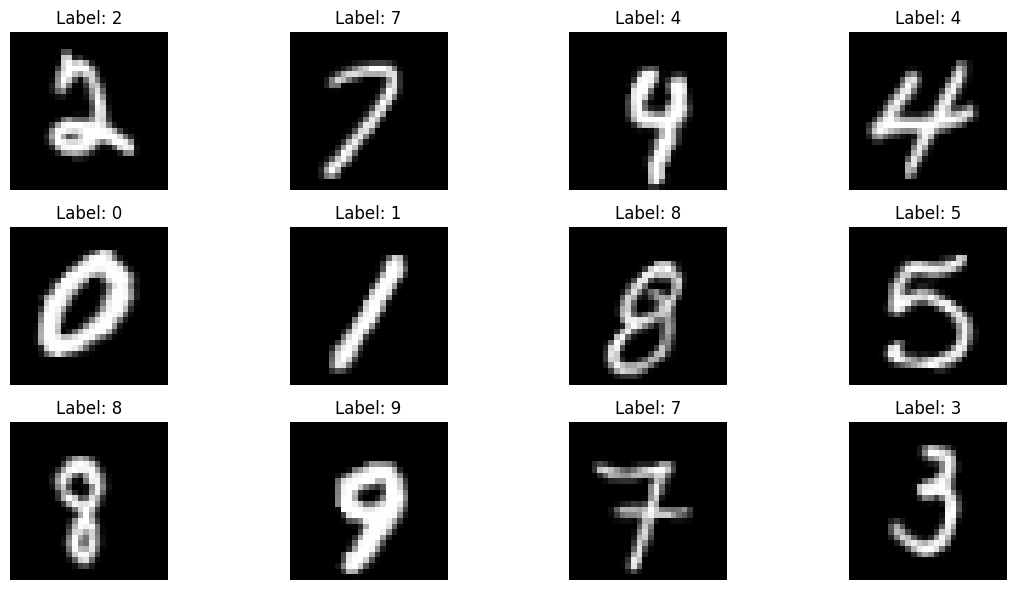

In [ ]:
import numpy as np
images, labels = next(train_generator)
plt.figure(figsize=(12, 6))

for i in range(12):
    plt.subplot(3, 4, i + 1)
    img = images[i].reshape(28, 28)
    label = np.argmax(labels[i])

    plt.imshow(img, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')

plt.tight_layout()


In [ ]:
model.fit(train_generator,steps_per_epoch=60000//64, epochs=5,validation_data=test_generator,validation_steps = 10000//64)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


937/937 ━━━━━━━━━━━━━━━━━━━━ 50s 53ms/step - accuracy: 0.9664 - loss: 0.1043 - val_accuracy: 0.9818 - val_loss: 0.0618
Epoch 2/5
  1/937 ━━━━━━━━━━━━━━━━━━━━ 34s 37ms/step - accuracy: 0.9375 - loss: 0.1369

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


937/937 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9375 - loss: 0.1369 - val_accuracy: 0.9816 - val_loss: 0.0630
Epoch 3/5
937/937 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.9793 - loss: 0.0636 - val_accuracy: 0.9905 - val_loss: 0.0306
Epoch 4/5
937/937 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9844 - loss: 0.1673 - val_accuracy: 0.9900 - val_loss: 0.0311
Epoch 5/5
937/937 ━━━━━━━━━━━━━━━━━━━━ 104s 50ms/step - accuracy: 0.9826 - loss: 0.0542 - val_accuracy: 0.9888 - val_loss: 0.0331


# CNN Architecture: Rules of Thumb

This note provides clear, practical guidelines for structuring CNNs effectively in image classification tasks.

---

## 1. Convolutional Layers (`Conv2D`)

- Use **small filters**, typically `(3,3)`.
- Start with **fewer filters** (e.g., 32), increasing in deeper layers (e.g., 64, 128).
- Doubling filters as you go deeper helps capture increasingly complex patterns.

**Example:**
```python
Conv2D(32, (3,3))
Conv2D(64, (3,3))
Conv2D(128, (3,3))
```

---

## 2. MaxPooling Layers (`MaxPooling2D`)

- Use after 1-2 Conv layers to reduce spatial dimensions.
- Common pooling window: `(2,2)`.
- Reduces computation while preserving important features.
- Do not overuse to avoid excessive spatial information loss.

**Example:**
```python
MaxPooling2D(pool_size=(2,2))
```

---

## 3. Batch Normalization (`BatchNormalization`)

- Use after Conv and Dense layers to stabilize and speed up training.
- Helps use higher learning rates and reduces sensitivity to initialization.
- Optional but beneficial for deeper models.

**Example:**
```python
BatchNormalization()
```

---

## 4. Dropout (`Dropout`)

- Helps prevent overfitting by randomly dropping neurons during training.
- Typical rates:
  - `0.25` after Conv layers (if needed).
  - `0.5` after Dense layers before the output layer.

**Example:**
```python
Dropout(0.5)
```

---

## 5. Flatten Layer (`Flatten`)

- Converts 3D feature maps `(height, width, channels)` into a 1D vector for Dense layers.

**Example:**
```python
Flatten()
```

---

## 6. Dense Layers (`Dense`)

- Add 1–2 Dense layers after convolutional layers:
  - One with `128` or `512` neurons, using `relu`.
  - Final Dense layer with `num_classes` neurons and `softmax` for classification.

**Example:**
```python
Dense(128, activation='relu')
Dense(10, activation='softmax')
```

---

## 7. Activation Functions

- Use `'relu'` for hidden Conv and Dense layers.
- Use `'softmax'` for the final output layer in classification tasks.

---

## Example CNN Structure

```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
```

---

## Recap of Rules

- Start with **Conv layers**: 32, 64, 128 filters.
- Add **MaxPooling** every 1-2 Conv layers.
- Optionally use **BatchNormalization** for stability.
- Use **Dropout** to prevent overfitting.
- Flatten before Dense layers.
- Use **Dense layers** for final classification.
- Use `'relu'` for hidden layers, `'softmax'` for output.

---

Following these structured guidelines will help you design stable, effective CNN models for your MNIST and general image classification projects.


In [ ]:
model.save("mnist_cnn.h5")


In [ ]:
from google.colab import files
files.download("mnist_cnn.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>